# Prediction of car accidents
This notebook is created to be used in Coursera Applied Data Science Capstone Project.

## Introduction/Business Problem

In our time, cars are used for both leisure purposes and transport. By 2019, there were a car per two persons in the most of the developed countries while in some of them it is even more.  There are more and more cars on the roads as the demand increases. 

With the increase of cars on the roads, the accident probability increases. Prediction of car accidents and their severity is important to decrease deaths, injuries and damage to vehicles. With an accurate predictive tool, people may plan their travels accordingly to avoid accidents. So, building a model to predict probability and severity of an accident with influencing parameters is necessary.

Drivers and passangers are the primary stakeholders that would be interested in knowing accident probability to make their transportation plans. Additionally, insurance companies and public authorities would be interested in such a model to avoid loss of money due to damages and hospital costs.

## Data

To solve this problem, the data collected for Seattle city is used. The data includes all collisions provided by SPD and recorded by Traffic Records from 2004 to 2019. The dataset contains 7397574 entries for accident information with variable name of SEVERITY CODE and some related data such as location, road conditions etc in 38 columns (194673x38 table). The prediction will be done for SEVERITY CODE. First the attributes that will be used in the modeling will be selected and data will be prepared for model building. In my opinion, the attributes WEATHER, ROADCOND, LIGHTCOND are valuable for the prediction model. These attributes would mostly available for any time of the year; so, the model would work with their values. Also, some filtering might be done by using attributes such as UNDERINFL, which shows whether the driver was under influence of drugs etc. 

## Methods

In the final model, SEVERITY CODE is used as target while the attributes WEATHER describing the weather conditions during
the time of the collision, ROADCOND showing the condition of the road during the collision and LIGHTCOND showing the light conditions during the collision are used as predictors.

INATTENTIONIND showing whether or not collision was due to inattention, UNDERINFL showing whether or not a driver involved was under the influence of drugs or alcohol and SPEEDING showing whether or not speeding was a factor in the collision are used in the data exploration step. 

First, the data table consisting only the variables that are used in the model and exploratory step is created. SEVERITY CODE values of 0 (0 = unknown) are planned to be excluded from the analysis since they do noy provide any information on accident severity . It is observed that the only severity codes included in the initial data were 1 and 2; so, no exclusion was made by SEVERITY CODE. 9333 rows with SPEEDING answered yes, 5126 (entry Y) + 3995 (entry 1) = 9121 rows with UNDERINFL answered yes and 29805 rows with INATTENTIONIND answered yes are excluded to avoid person-related accidents. The final data frame has shape of 144089x4 excluding 3 columns (SPEEDING, INATTENTIONIND and UNDERINFL) used in the preparation step and null entries for predictory variables.

Associations between the predictors between themselves and with target values are explored via using Cramer's V statistic since all variables are categorical. Moderate correlation between WEATHER and ROADCOND (0.48), and low correlation between WEATHER and LIGHTCOND (0.27) and between ROADCOND and LIGHTCOND (0.27) are found. None of the predictors are found to be highly correlated with target value (0.17-0.18 are the calculated correlation values). 

The problem is a classification problem with two different output values for the target variable. Thus, classification methods are applied: KNN, decision trees, logistic regression and support vector machines. Before the method applications the dataset is divided into training (70%) and test sets (30%). The predictor variables are converted to dummy variables.


## Results and Discussion

K nearest neighbors method gives best accuracy of 71.5% with k = 8. All methods are compared by using Jaccard score. There is no method which result in very good accuracy. KNN with k = 8 is selected as the final model with mean accuracy of about 50%.  
  
## Conclusion

The predictive model for accident severity using weather, road and light conditions provides good accuracy. The resulted model can be implemented in any algorithm used to calculate insurance rates. However, there should be some improvement of the model for low number of more severe accidents and maybe additional predictive variables. 
  

In [79]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as ss
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import pylab as pl
import scipy.optimize as opt

In [3]:
df = pd.read_csv("/Users/toz022/Desktop/courses_meetings/coursera-applied ds capstone/Data-Collisions.csv")
df.head()

/Users/toz022/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Data Preparation and Exploration

In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [26]:
df_final = df[['SEVERITYCODE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']]
df_final.shape

(194673, 7)

In [27]:
df_final = df_final[df_final.SEVERITYCODE != 0]
df_final.shape

(194673, 7)

In [23]:
df_final['SEVERITYCODE'].value_counts(dropna=False)

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [28]:
df_final[['SPEEDING']].value_counts()

SPEEDING
Y           9333
dtype: int64

In [14]:
df_final[['UNDERINFL']].value_counts()

UNDERINFL
N            100274
0             80394
Y              5126
1              3995
dtype: int64

In [15]:
df_final[['INATTENTIONIND']].value_counts()

INATTENTIONIND
Y                 29805
dtype: int64

In [33]:
df_final = df_final[-df_final.SPEEDING.isin(['Y']) & 
                    -df_final.UNDERINFL.isin(['Y','1']) &
                    -df_final.INATTENTIONIND.isin(['Y'])]
df_final = df_final[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
df_final.shape

(149315, 4)

In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149315 entries, 0 to 194672
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  149315 non-null  int64 
 1   WEATHER       144281 non-null  object
 2   ROADCOND      144320 non-null  object
 3   LIGHTCOND     144206 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.7+ MB


In [39]:
df_final.dropna(inplace=True)
df_final.shape

(144089, 4)

In [40]:
df_final[['WEATHER']].value_counts()

WEATHER                 
Clear                       83538
Raining                     23901
Overcast                    20579
Unknown                     14146
Other                         734
Snowing                       649
Fog/Smog/Smoke                389
Sleet/Hail/Freezing Rain       82
Blowing Sand/Dirt              46
Severe Crosswind               20
Partly Cloudy                   5
dtype: int64

In [41]:
df_final[['ROADCOND']].value_counts()

ROADCOND      
Dry               93944
Wet               34312
Unknown           14096
Ice                 771
Snow/Slush          704
Other                93
Standing Water       58
Oil                  57
Sand/Mud/Dirt        54
dtype: int64

In [42]:
df_final[['LIGHTCOND']].value_counts()

LIGHTCOND               
Daylight                    89384
Dark - Street Lights On     33451
Unknown                     12682
Dusk                         4563
Dawn                         1859
Dark - No Street Lights      1121
Dark - Street Lights Off      827
Other                         191
Dark - Unknown Lighting        11
dtype: int64

In [65]:
# https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792 for source 
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

confusion_matrix = pd.crosstab(df_final["WEATHER"], df_final["ROADCOND"]).values
wvsr = cramers_v(confusion_matrix)

In [66]:
confusion_matrix = pd.crosstab(df_final["WEATHER"], df_final["LIGHTCOND"]).values
wvsl = cramers_v(confusion_matrix)

In [67]:
confusion_matrix = pd.crosstab(df_final["ROADCOND"], df_final["LIGHTCOND"]).values
rvsl = cramers_v(confusion_matrix)

In [68]:
confusion_matrix = pd.crosstab(df_final["SEVERITYCODE"], df_final["WEATHER"]).values
svsw = cramers_v(confusion_matrix)
confusion_matrix = pd.crosstab(df_final["SEVERITYCODE"], df_final["ROADCOND"]).values
svsr = cramers_v(confusion_matrix)
confusion_matrix = pd.crosstab(df_final["SEVERITYCODE"], df_final["LIGHTCOND"]).values
svsl = cramers_v(confusion_matrix)

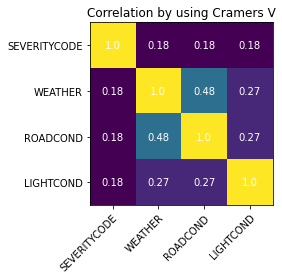

In [72]:
np.set_printoptions(formatter={'float': '{:>.3f}'.format})
cordata = np.array([[1.0, round(svsw,2), round(svsr,2), round(svsl,2)],
                   [round(svsw,2), 1.0, round(wvsr,2), round(wvsl,2)],
                   [round(svsr,2), round(wvsr,2), 1.0, round(rvsl,2)],
                   [round(svsl,2), round(wvsl,2), round(rvsl,2), 1.0]])
fig, ax = plt.subplots()
im = ax.imshow(cordata)

# We want to show all ticks...
ax.set_xticks(np.arange(len(df_final.columns)))
ax.set_yticks(np.arange(len(df_final.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(df_final.columns)
ax.set_yticklabels(df_final.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(df_final.columns)):
    for j in range(len(df_final.columns)):
        text = ax.text(j, i, cordata[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Correlation by using Cramers V")
fig.tight_layout()
plt.show()

# Machine Learning

In [96]:
X = df_final[['WEATHER', 'ROADCOND', 'LIGHTCOND']].values
X[0:5]

array([['Overcast', 'Wet', 'Daylight'],
       ['Raining', 'Wet', 'Dark - Street Lights On'],
       ['Overcast', 'Dry', 'Daylight'],
       ['Clear', 'Dry', 'Daylight'],
       ['Raining', 'Wet', 'Daylight']], dtype=object)

In [97]:
from sklearn import preprocessing
le_weather = preprocessing.LabelEncoder()
le_weather.fit(df_final.WEATHER.unique())
X[:,0] = le_weather.transform(X[:,0]) 

le_road = preprocessing.LabelEncoder()
le_road.fit(df_final.ROADCOND.unique())
X[:,1] = le_road.transform(X[:,1]) 

le_light = preprocessing.LabelEncoder()
le_light.fit(df_final.LIGHTCOND.unique())
X[:,2] = le_light.transform(X[:,2]) 

X[0:5]

array([[4, 8, 5],
       [6, 8, 2],
       [4, 0, 5],
       [1, 0, 5],
       [6, 8, 5]], dtype=object)

In [98]:
y = df_final["SEVERITYCODE"]
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (100862, 3) (100862,)
Test set: (43227, 3) (43227,)


## KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.500, 0.713, 0.679, 0.714, 0.709, 0.709, 0.709, 0.715, 0.574])

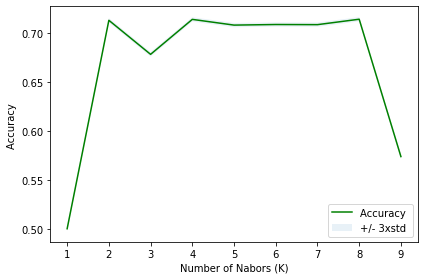

In [102]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [103]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7145765378120157 with k= 8


In [132]:
from sklearn.metrics import jaccard_score
neigh = KNeighborsClassifier(n_neighbors = 8).fit(X_train,y_train)
yhat=neigh.predict(X_test)
jaccard_score(y_test, yhat)

0.714470852329268

In [133]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.72      1.00      0.83     30917
           2       0.27      0.00      0.00     12310

    accuracy                           0.71     43227
   macro avg       0.49      0.50      0.42     43227
weighted avg       0.59      0.71      0.60     43227



# Logistic regression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [115]:
yhat1 = LR.predict(X_test)

In [116]:
jaccard_score(y_test, yhat1)

0.7152242811205959

In [131]:
print (classification_report(y_test, yhat1))

              precision    recall  f1-score   support

           1       0.72      1.00      0.83     30917
           2       0.00      0.00      0.00     12310

    accuracy                           0.72     43227
   macro avg       0.36      0.50      0.42     43227
weighted avg       0.51      0.72      0.60     43227



/Users/toz022/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision trees

In [112]:
from sklearn.tree import DecisionTreeClassifier
accTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
accTree.fit(X_train,y_train)
predTree = accTree.predict(X_test)

In [113]:
jaccard_score(y_test, predTree)

0.7152242811205959

# SVM

In [117]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat2 = clf.predict(X_test)
jaccard_score(y_test, yhat2)

0.7152242811205959

In [134]:
print (classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           1       0.72      1.00      0.83     30917
           2       0.00      0.00      0.00     12310

    accuracy                           0.72     43227
   macro avg       0.36      0.50      0.42     43227
weighted avg       0.51      0.72      0.60     43227



/Users/toz022/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
